<a href="https://colab.research.google.com/github/tuancompa2610/Air-Quality-Time-Series/blob/main/Linear_Regression_Air_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import time

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AutoReg

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cfafrica-_-sensors.africa-_-cft.csv to cfafrica-_-sensors.africa-_-cft.csv


In [3]:
df = pd.read_csv("/content/cfafrica-_-sensors.africa-_-cft.csv")
df.head()

,sensor_id,sensor_type,location,lat,lon,timestamp,P1,durP1,ratioP1,P2,durP2,ratioP2
0,29,SDS011,11,-6.818,39.285,2017-12-01T00:00:44.094494+00:00,6.03,NaN,NaN,4,NaN,NaN
1,29,SDS011,11,-6.818,39.285,2017-12-01T00:03:13.870148+00:00,4.93,NaN,NaN,3.9,NaN,NaN
2,29,SDS011,11,-6.818,39.285,2017-12-01T00:05:43.505681+00:00,4.30,NaN,NaN,3.9,NaN,NaN
3,29,SDS011,11,-6.818,39.285,2017-12-01T00:08:13.116753+00:00,8.70,NaN,NaN,4.3,NaN,NaN
4,29,SDS011,11,-6.818,39.285,2017-12-01T00:10:42.711977+00:00,6.97,NaN,NaN,4.6,NaN,NaN


In [4]:
df["timestamp"] = df["timestamp"].str[:-6]
df.head()

,sensor_id,sensor_type,location,lat,lon,timestamp,P1,durP1,ratioP1,P2,durP2,ratioP2
0,29,SDS011,11,-6.818,39.285,2017-12-01T00:00:44.094494,6.03,NaN,NaN,4,NaN,NaN
1,29,SDS011,11,-6.818,39.285,2017-12-01T00:03:13.870148,4.93,NaN,NaN,3.9,NaN,NaN
2,29,SDS011,11,-6.818,39.285,2017-12-01T00:05:43.505681,4.30,NaN,NaN,3.9,NaN,NaN
3,29,SDS011,11,-6.818,39.285,2017-12-01T00:08:13.116753,8.70,NaN,NaN,4.3,NaN,NaN
4,29,SDS011,11,-6.818,39.285,2017-12-01T00:10:42.711977,6.97,NaN,NaN,4.6,NaN,NaN


In [5]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.set_index("timestamp")
df.head()

,sensor_id,sensor_type,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
timestamp,,,,,,,,,,,
2017-12-01 00:00:44.094494,29,SDS011,11,-6.818,39.285,6.03,NaN,NaN,4,NaN,NaN
2017-12-01 00:03:13.870148,29,SDS011,11,-6.818,39.285,4.93,NaN,NaN,3.9,NaN,NaN
2017-12-01 00:05:43.505681,29,SDS011,11,-6.818,39.285,4.30,NaN,NaN,3.9,NaN,NaN
2017-12-01 00:08:13.116753,29,SDS011,11,-6.818,39.285,8.70,NaN,NaN,4.3,NaN,NaN
2017-12-01 00:10:42.711977,29,SDS011,11,-6.818,39.285,6.97,NaN,NaN,4.6,NaN,NaN


In [6]:
df.drop(columns = ["sensor_id", "sensor_type", "location", "lat", "lon",
                   "durP1", "ratioP1", "durP2", "ratioP2", "P1"], inplace = True)
df.head()

,P2
timestamp,
2017-12-01 00:00:44.094494,4
2017-12-01 00:03:13.870148,3.9
2017-12-01 00:05:43.505681,3.9
2017-12-01 00:08:13.116753,4.3
2017-12-01 00:10:42.711977,4.6


In [7]:
df.index = df.index.tz_localize("UTC").tz_convert("Africa/Dar_es_Salaam")
df.head()

,P2
timestamp,
2017-12-01 03:00:44.094494+03:00,4
2017-12-01 03:03:13.870148+03:00,3.9
2017-12-01 03:05:43.505681+03:00,3.9
2017-12-01 03:08:13.116753+03:00,4.3
2017-12-01 03:10:42.711977+03:00,4.6


In [8]:
df.dropna(inplace = True)
df["P2"] = pd.to_numeric(df["P2"], errors='coerce')

### Remove Outlier

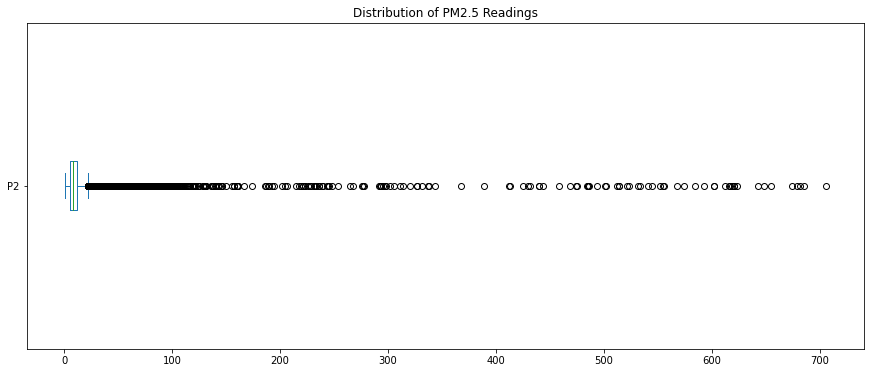

In [9]:
fig, ax = plt.subplots(figsize=(15, 6))
df["P2"].plot(kind = "box", vert = False, title = "Distribution of PM2.5 Readings", ax = ax)

In [10]:
low, high = df["P2"].quantile([0, 0.9])
df["P2"] = df[df["P2"].between(low, high)]

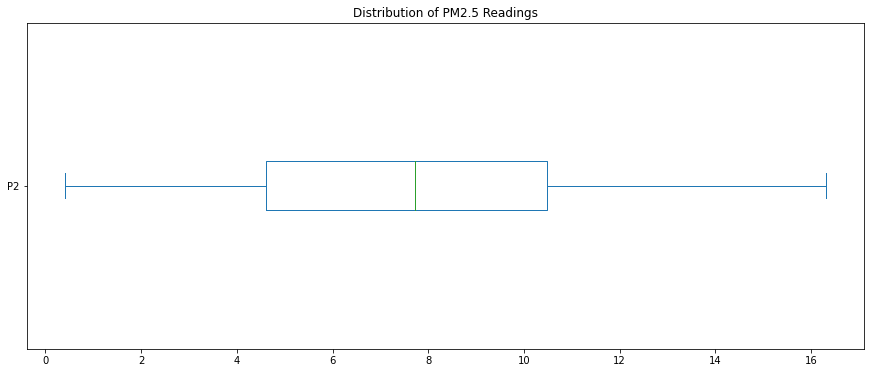

In [11]:
fig, ax = plt.subplots(figsize=(15, 6))
df["P2"].plot(kind = "box", vert = False, title = "Distribution of PM2.5 Readings", ax = ax)

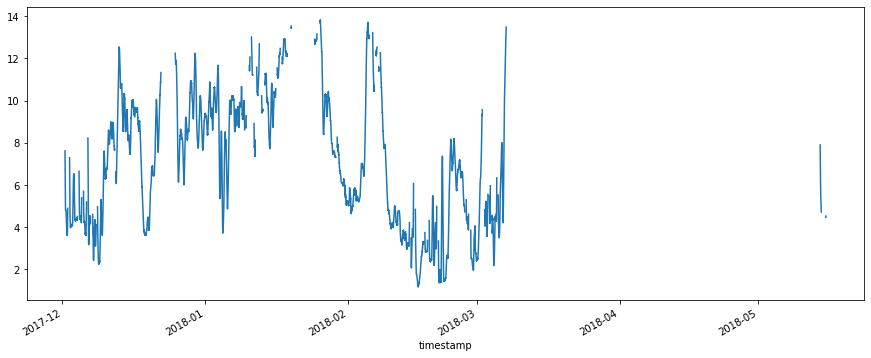

In [12]:
fig, ax = plt.subplots(figsize=(15, 6))
df["P2"].rolling(168).mean().plot(ax=ax)

In [13]:
df = df["P2"].resample("1H").mean().fillna(method = "ffill").to_frame()
df["P2.L1"] = df["P2"].shift(1)

In [17]:
df.dropna(inplace = True)
df.head()

,P2,P2.L1
timestamp,,
2017-12-01 04:00:00+03:00,4.344583,4.204167
2017-12-01 05:00:00+03:00,9.375417,4.344583
2017-12-01 06:00:00+03:00,14.057917,9.375417
2017-12-01 07:00:00+03:00,14.454783,14.057917
2017-12-01 08:00:00+03:00,13.350000,14.454783


In [18]:
df.corr()

,P2,P2.L1
P2,1.000000,0.955042
P2.L1,0.955042,1.000000


Text(0.5, 1.0, 'PM2.5 Autocorrelation')

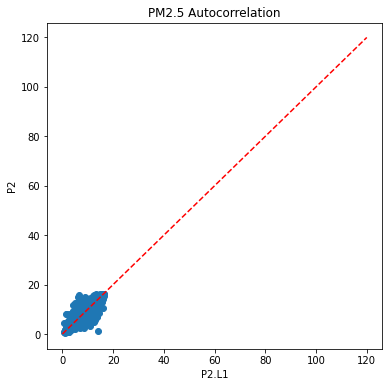

In [19]:

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x = df["P2.L1"], y = df["P2"])
ax.plot([0, 120], [0, 120], linestyle = "--", color = "r")
plt.xlabel("P2.L1")
plt.ylabel("P2")
plt.title("PM2.5 Autocorrelation")

# Split Data

In [23]:
target = "P2"
y = df[target]
X = df.drop(columns = target)
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (4172, 1)
y shape: (4172,)


In [21]:
X.head()

,P2.L1
timestamp,
2017-12-01 04:00:00+03:00,4.204167
2017-12-01 05:00:00+03:00,4.344583
2017-12-01 06:00:00+03:00,9.375417
2017-12-01 07:00:00+03:00,14.057917
2017-12-01 08:00:00+03:00,14.454783


In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_val.shape)
print("y_test shape:", y_val.shape)

X_train shape: (3337, 1)
y_train shape: (3337,)
X_test shape: (835, 1)
y_test shape: (835,)


# Model

### Linear Regression

In [26]:
y_train_mean = y_train.mean()
y_pred_baseline = [y_train_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_pred_baseline, y_train)

print("Mean P2 Reading:", round(y_train.mean(), 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean P2 Reading: 8.52
Baseline MAE: 2.44


In [32]:
model = make_pipeline(LinearRegression())
model.fit(X_train, y_train)

Pipeline(steps=[('linearregression', LinearRegression())])

In [34]:
training_mae = mean_absolute_error(y_train, model.predict(X_train))
test_mae = mean_absolute_error(y_val, model.predict(X_val))
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(test_mae, 2))

Training MAE: 0.45
Test MAE: 0.48


Communicate

In [35]:
intercept = model.named_steps["linearregression"].intercept_
coefficient = model.named_steps["linearregression"].coef_

print(f"P2 = {intercept} + ({coefficient} * P2.L1)")

P2 = 0.3754818997556981 + ([0.95542632] * P2.L1)


In [36]:
y_pred = model.predict(X_val)
df_pred_test = pd.DataFrame(
{"y_test": y_val, "y_pred": y_pred}, index = y_val.index
)
df_pred_test.head()

,y_test,y_pred
timestamp,,
2018-01-30 15:00:00+03:00,5.776667,5.273634
2018-03-05 06:00:00+03:00,7.207083,4.688834
2017-12-31 15:00:00+03:00,9.297917,8.883155
2017-12-23 20:00:00+03:00,15.569500,15.462346
2018-03-13 13:00:00+03:00,11.562778,11.422864


In [37]:
fig = px.line(df_pred_test)
fig.show()